In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

### Create toy data


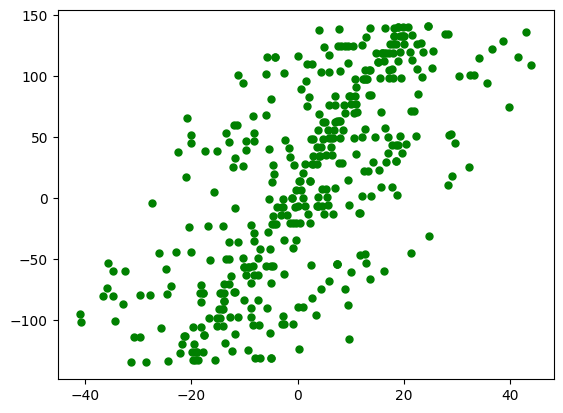

In [ ]:
n = 400

# generate data along random line (y = mx + c)
m = np.random.randint(1, 10)
c = np.random.randint(1, 10)
x1 = np.random.randint(-20, 20, size=(n))

y1 = m*x1 + c

# add random noise
noise = np.random.rand(n) * np.random.randint(-35,35,size=n)

#make the noise orthogonal to the line y=mx+c and add it.
x=x1 + noise*m/np.sqrt(1+m**2)
y=y1 + noise/np.sqrt(1+m**2)

# vizualize
plt.plot(x, y, 'o', color='green', markersize=5)

## Iterative algorithm for PCA

(-50.0, 40.0, -90.0, 90.0)

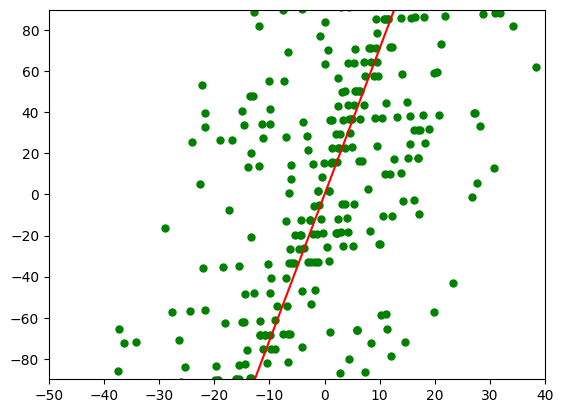

In [ ]:
data = np.stack((x.T, y.T), axis=-1)

# IMPORTANT: CENTERING SO WE DON'T DO THIS BACK and FORTH!!!
# centering the data i.e, mean = (0, 0)
data = data - np.mean(data, axis=0)

def unit_vector(angle):
    angle_rad = np.deg2rad(angle)
    return np.array([[np.cos(angle_rad)], [np.sin(angle_rad)]])


def draw_line(ang, rng=[-50, 50], color='red'):
    m = np.tan(np.deg2rad(ang))
    x = np.arange(rng[0], rng[1])
    y = x * m
    plt.plot(x, y, '-', linewidth=1.5, color=color)


max_var_ang = np.argmax([np.var(np.dot(data, unit_vector(i))) for i in range(180)])
min_var_ang = np.argmin([np.var(np.dot(data, unit_vector(i))) for i in range(180)])

plt.plot(data[:, 0], data[:, 1], 'o', color='green', markersize=5)
draw_line(max_var_ang)
#draw_line(min_var_ang, rng=[-30, 30], color='blue')
plt.axis([-50, 40, -90, 90])

## Better algorithm for PCA
### Diagonlizing the covariance matrix

#### STEP 1: Find covariance matrix

In [ ]:
covmat = np.cov(data.T)

covmat

array([[233.3637608 , 306.34309812],
       [306.34309812, 538.17879326]])

#### STEP 2: Eigenvalue decomposition


In [ ]:
eig_vals, eig_vecs = np.linalg.eig(covmat)

eig_vals, eig_vecs

(array([ 43.61028456, 727.9322695 ]),
 array([[-0.85012538, -0.52658032],
        [ 0.52658032, -0.85012538]]))

#### STEP 3: Sort eigenvalues and eigenvectors

In [ ]:
sort_idx = np.argsort(eig_vals)[::-1]
sorted_pair = list(zip(eig_vals[sort_idx], eig_vecs[sort_idx]))

PCA via Singular Value Decomposition

In [ ]:
u, s, v = np.linalg.svd(data - data.mean(axis=0))
v

array([[-0.52658032, -0.85012538],
       [-0.85012538,  0.52658032]])

#### Results

In [ ]:
best_ang = np.abs(np.rad2deg(np.arctan(sorted_pair[0][1][1]/sorted_pair[0][1][0])))

print("PCA angle (better algo):\t {0}".format(best_ang))
print("PCA angle (iterative algo):\t {0}".format(max_var_ang))

PCA angle (better algo):	 83.50730940697338
PCA angle (iterative algo):	 84


(-50.0, 40.0, -90.0, 90.0)

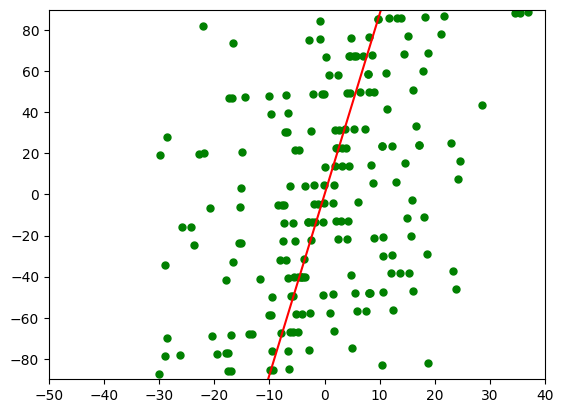

In [ ]:
plt.plot(data[:, 0], data[:, 1], 'o', color='green', markersize=5)
draw_line(best_ang)
plt.axis([-50, 40, -90, 90])

#### Compression using PCA

In [ ]:
pc = sorted_pair[0][1]
pc

array([ 0.11307646, -0.99358629])

In [ ]:
data_points = data[0:100]
data_points

array([[-2.03877597e+01, -1.75420862e+02],
       [ 1.87092813e+01,  1.40034365e+02],
       [ 2.00922508e+01,  1.49076917e+02],
       [-4.13459097e+00, -1.02503843e+02],
       [-2.58615621e+01, -1.60290625e+01],
       [ 5.34584327e+00,  3.18828715e+01],
       [ 4.00457496e+01,  1.77960639e+02],
       [ 1.58419139e+01, -2.50645402e+00],
       [ 1.01888938e+01,  1.21309877e+02],
       [ 1.17339290e+01,  8.59259921e+01],
       [ 3.71916849e+01,  1.59865743e+02],
       [ 3.37991885e+00, -1.72780009e+02],
       [ 1.10986641e+01,  9.47442960e+01],
       [ 6.59724038e+00,  1.74244138e+02],
       [ 2.16390785e+01,  8.70265643e+01],
       [ 6.64414246e+00, -1.45750651e+02],
       [-7.40428924e+00, -1.39782544e+01],
       [-1.21674642e+01, -1.74507496e+02],
       [-2.30327589e+01, -1.75714751e+02],
       [ 2.03400293e+01,  1.13548892e+02],
       [ 1.03976282e+00, -5.74844708e+01],
       [ 4.64200086e+01,  1.34224445e+02],
       [ 4.88060165e+00,  7.62756224e+01],
       [-3.

In [ ]:
compressed_data = np.dot(data_points, pc)
compressed_data

array([ 171.99038784, -137.02064539, -145.84881995,  101.37888853,
         13.0019228 ,  -31.07389493, -172.2910192 ,    4.28172588,
       -119.37970659,  -84.04805651, -154.63490608,  172.05403728,
        -92.88163586, -172.38059374,  -84.02153068,  145.56714443,
         13.05135107,  172.01240165,  171.98330458, -110.5206439 ,
         57.23335473, -128.11455841,  -75.23453147,   48.39786715,
         48.46265792,   13.06318591,  145.4546779 ,  136.64879058,
          4.1834961 ,   -4.56879089,  145.45027322,  171.97775012,
        -31.0784775 , -119.32737186,  -22.21026194,  -31.16457203,
         13.07897102, -110.58000943,  145.48611024, -172.35431452,
        136.66829659,   83.75390392, -110.56190637, -137.06107908,
         39.53546275,   74.81663232,  101.36454033,  -13.41956847,
        145.49734125, -101.71207865,  -48.77080217,  101.29069516,
         92.51336297,  101.38455297, -172.32452032, -110.57950509,
        -48.75319558, -154.64827294,  154.33337765,  136.63224

In [ ]:
# recontructing the data back
# learn about broadcasting
reconstructed_data_points = np.expand_dims(compressed_data, axis=-1)*pc
reconstructed_data_points

array([[  19.44806416, -170.88729125],
       [ -15.49380949,  136.14183461],
       [ -16.49206821,  144.91338781],
       [  11.4635658 , -100.72867367],
       [   1.4702114 ,  -12.91853223],
       [  -3.51372603,   30.87459596],
       [ -19.48205849,  171.18599444],
       [   0.4841624 ,   -4.25426413],
       [ -13.49903458,  118.61403969],
       [  -9.50385667,   83.50899659],
       [ -17.48556772,  153.64312253],
       [  19.45526141, -170.95053246],
       [ -10.50272655,   92.28591992],
       [ -19.49218726,  171.27499448],
       [  -9.50085723,   83.48264089],
       [  16.46021734, -144.63351888],
       [   1.47580057,  -12.96764348],
       [  19.4505534 , -170.90916387],
       [  19.44726321, -170.88025341],
       [ -12.49728313,  109.81179646],
       [   6.47174513,  -56.86627655],
       [ -14.4867407 ,  127.29286869],
       [  -8.50725447,   74.75199895],
       [   5.47265947,  -48.08745723],
       [   5.47998578,  -48.15183245],
       [   1.47713881,  -

In [ ]:
error = np.sum(np.abs(data_points - reconstructed_data_points))/data_points.shape[0]
error

27.385970547481985

## Digits Visualization

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

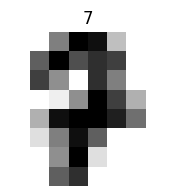

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

ind = np.random.randint(0,digits.data.shape[0])
plt.figure(figsize=(2,2))
plt.imshow(digits.images[ind], cmap='binary', interpolation='nearest')
plt.title(str(digits.target[ind]))
plt.axis('off')
plt.axis('equal')
plt.show()

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


<ipython-input-19-9a7b11f21571>:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('tab20', 10))


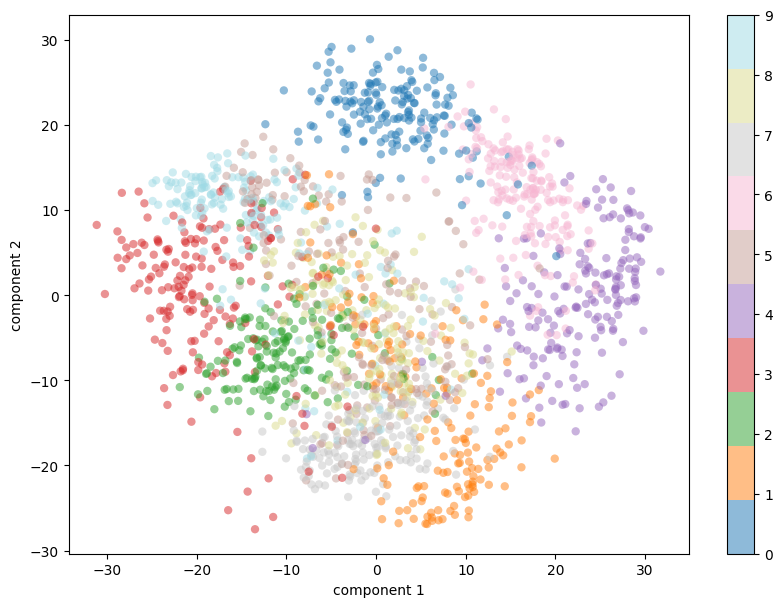

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('tab20', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()

## Denoising Example

If we add random noise to the data it should not contribute to high variance dimensions. Therefore, PCA can help in denoising the data.

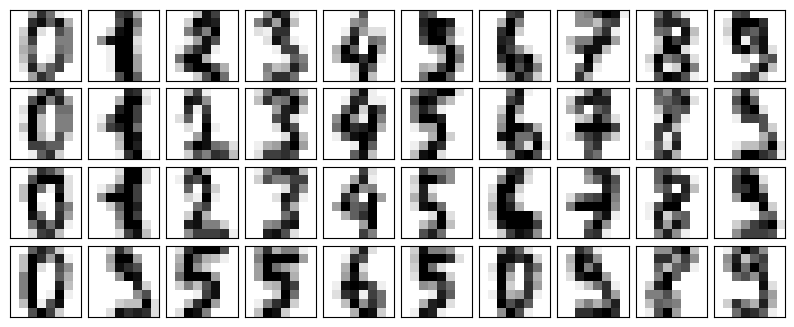

In [ ]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(digits.data)

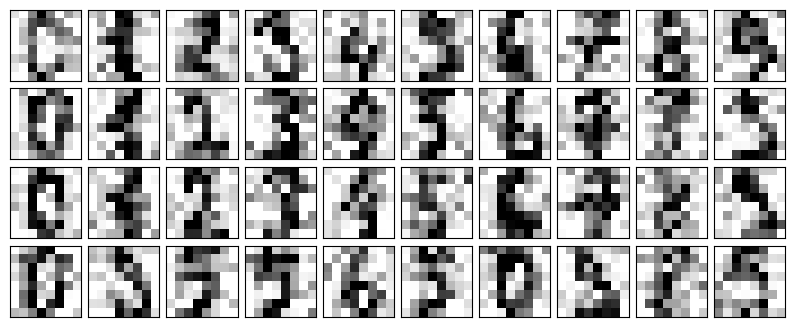

In [ ]:
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

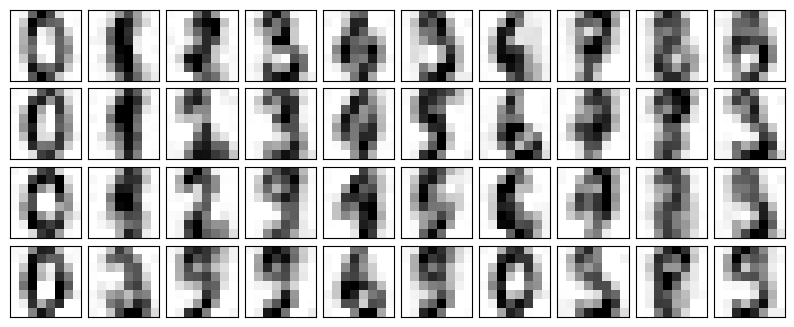

In [ ]:
# use 50% of real dimensions components

pca = PCA(0.4).fit(noisy)
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

## PCA: Face Search Example

In [ ]:
from sklearn.datasets import fetch_lfw_people
#import logging
# Display progress logs on stdout
#logging.basicConfig(level=logging.INFO, format='%(asctime)s %(message)s')
lfw_people = fetch_lfw_people(resize=0.4)

In [ ]:
lfw_people.data.shape

(13233, 1850)

(-0.5, 36.5, 49.5, -0.5)

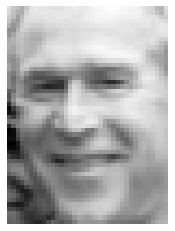

In [ ]:
plt.imshow(lfw_people.images[-10], cmap='Greys_r')
plt.axis('off')

### Run PCA

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=100)

In [ ]:
pca.fit(lfw_people.data)

PCA(n_components=100)

### Eigen faces

Eigen face is pricipal components after applying PCA on data-set. Intuitively, each eigen face represent a feature set such that their linear combinations can be used to construct any other faces.

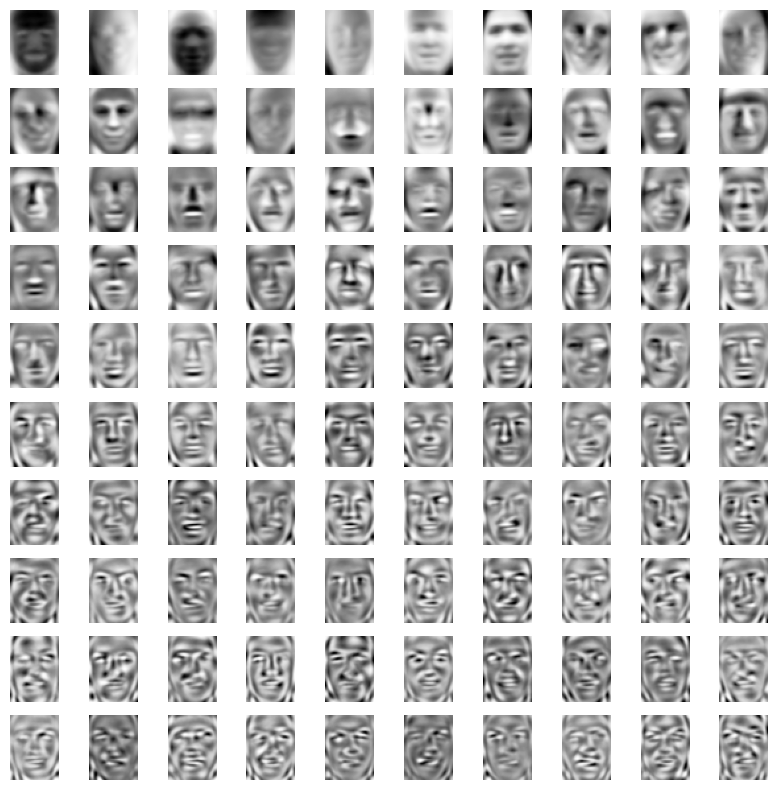

In [ ]:
plt.figure(figsize=(10, 10))
for i, component in enumerate(pca.components_):
    plt.subplot(10, 10, i+1)
    plt.imshow(component.reshape(lfw_people.images[0].shape), cmap='Greys_r')
    plt.axis('off')

### Creating a face mixture of Donald Trump + Paul Martin

In [ ]:
rf = np.zeros((50, 37)) + pca.mean_.reshape(50, 37)
components = pca.transform(lfw_people.data)

In [ ]:
def find_person(name_substr):
    for i, name in enumerate(lfw_people.target_names):
        if name_substr in name:
            print(i, name)

find_person('Donald Trump')
#find_person('Trudeau')
#find_person('Harper')
find_person('Paul Martin')

1405 Donald Trump
4267 Paul Martin


(-0.5, 36.5, 49.5, -0.5)

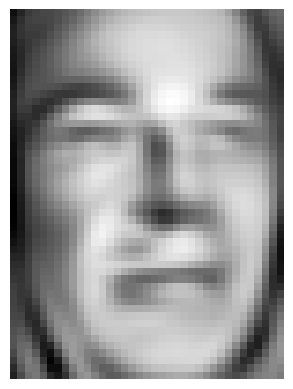

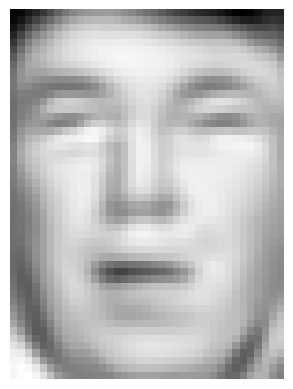

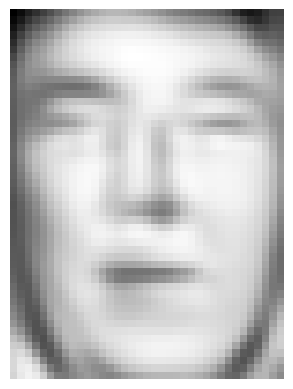

In [ ]:
# Donald Trump + Paul Martin
trumps = lfw_people.data[lfw_people.target == 1405]
martins = lfw_people.data[lfw_people.target == 4267]

np.random.shuffle(trumps)
np.random.shuffle(martins)

plt.figure()
plt.imshow(pca.inverse_transform(pca.transform(martins[0:1])).reshape(50, 37),
           cmap='Greys_r')
plt.axis('off')

plt.figure()
plt.imshow(pca.inverse_transform(pca.transform(trumps[0:1])).reshape(50, 37),
           cmap='Greys_r')
plt.axis('off')

plt.figure()
plt.imshow(pca.inverse_transform((pca.transform(trumps[0:1])
                                  + pca.transform(martins[0:1]))/2.).reshape(50, 37),
           cmap='Greys_r')
plt.axis('off')

### Constructing an external face

In [ ]:
!wget http://dev1-kimia.uwaterloo.ca:5000/data/tut2/me.png

--2023-10-15 21:20:43--  http://dev1-kimia.uwaterloo.ca:5000/data/tut2/me.png
Resolving dev1-kimia.uwaterloo.ca (dev1-kimia.uwaterloo.ca)... 129.97.72.207
Connecting to dev1-kimia.uwaterloo.ca (dev1-kimia.uwaterloo.ca)|129.97.72.207|:5000... 

In [ ]:
from skimage.io import imread
from skimage.transform import resize

im = imread('me.png')
im = np.mean(im, axis=2)
im = resize(im, (50, 37))

plt.imshow(im, cmap='Greys_r')
plt.axis('off')

FileNotFoundError: ignored

In [ ]:
lcp = pca.transform(im.ravel().reshape(1, -1))
plt.imshow(pca.inverse_transform(lcp).reshape(50, 37), cmap='Greys_r')
plt.axis('off')

### Querying the closest faces

In [ ]:
from scipy.spatial import cKDTree

# make a query tree indexing all the PCA reduced faces
pres_query = cKDTree(pca.transform(lfw_people.data))

# query external face (3 closest matches)
_, idxs = pres_query.query(lcp, k=3)
idxs

array([[ 3823,   962, 11522]])

In [ ]:
plt.figure(figsize=(10,5))

# plots the matches
plt.subplot(1, 4, 1)
plt.imshow(im, cmap='Greys_r')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(lfw_people.images[idxs[0][0]], cmap='Greys_r')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(lfw_people.images[idxs[0][1]], cmap='Greys_r')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(lfw_people.images[idxs[0][2]], cmap='Greys_r')
plt.axis('off')

NameError: ignored

#### Searching existing people

[[ 9401  5584  6161  1616  6551  4072  8694  8829 10642  5132]]


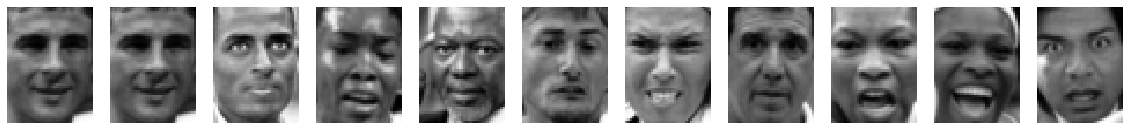

In [ ]:
sidx = np.random.randint(0, len(lfw_people.images))
lcp = pca.transform(lfw_people.data[sidx].reshape(1, -1))

n_query = 10
# query external face (3 closest matches)
_, t_idxs = pres_query.query(lcp, k=n_query)

print(t_idxs)
plt.figure(figsize=(20,10))


# plots the matches
plt.subplot(1, n_query+1, 1)
plt.imshow(lfw_people.images[sidx], cmap='Greys_r')
plt.axis('off')

for i in range(0, n_query):
    plt.subplot(1, n_query+1, i+2)
    plt.imshow(lfw_people.images[t_idxs[0][i]], cmap='Greys_r')
    plt.axis('off')